# Image-Classification with CNN flat network (1 hidden layer)


# 1. Imports

In [1]:

import numpy as np
import scipy.io as spio

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [2]:
#Function for converting rgb images from SVHN dataset to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])



In [3]:
def formatArray(data):
    im = []
    for i in range(0, data.shape[3]):
        im.append(rgb2gray(data[:, :, :, i]))
    return np.asarray(im)

In [4]:
#Function for updating labels (Replace 10 in labels with 0)

def fixLabel(labels):
    labels[labels == 10] = 0
    return labels

# Load training and test data

In [5]:

mat1 = spio.loadmat('train_32x32.mat', squeeze_me=True)     
mat2 = spio.loadmat('test_32x32.mat', squeeze_me=True)
train_images=mat1['X']
train_labels=mat1['y']
test_images=mat2['X']
test_labels=mat2['y']


test_images.shape


(32, 32, 3, 26032)

# Convert to proper format

In [6]:
train_images=formatArray(train_images)
test_images=formatArray(test_images)
train_labels=fixLabel(train_labels)
test_labels=fixLabel(test_labels)

In [26]:
train_images.shape

(73257, 32, 32)

In [27]:
test_images.shape

(26032, 32, 32)

In [7]:
#Specify class labels

class_names = ['0','1', '2', '3', '4', '5','6', '7', '8', '9']

# Visualizing a few images

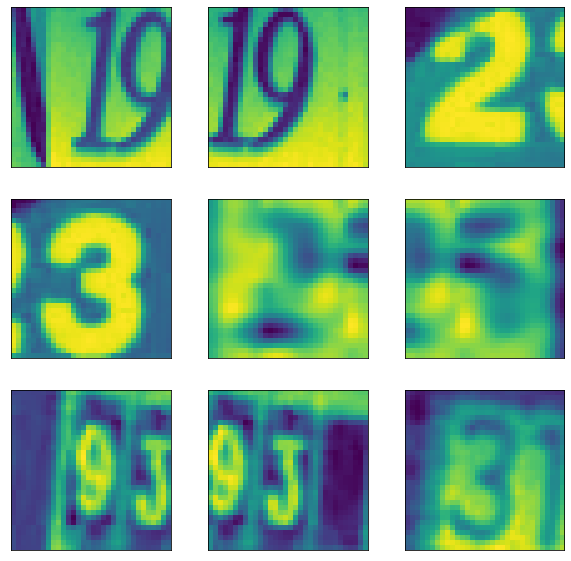

In [29]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

# Visualizing a few images in Gray

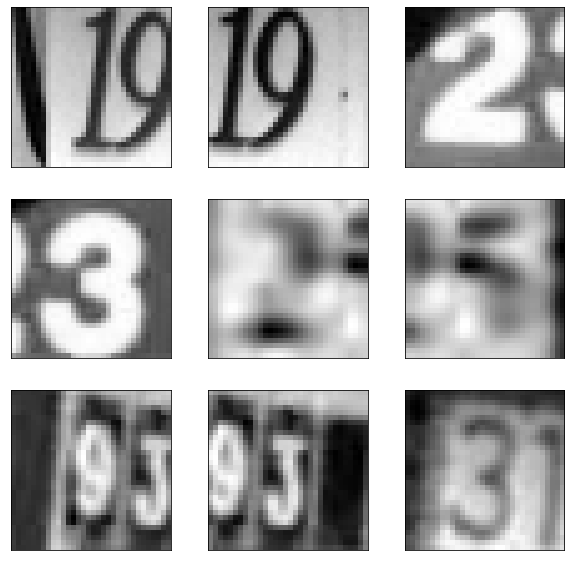

In [30]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap='gray')
plt.show()

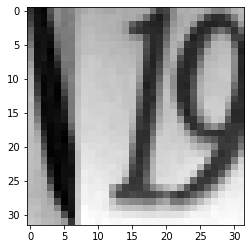

Label:  1


In [31]:
# show the number in the dataset
plt.imshow(train_images[0],cmap='gray')    
plt.show()
print('Label: ', train_labels[0])

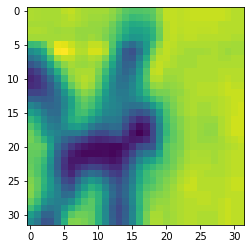

Label:  4


In [32]:
# Plot a random image and its label

plt.imshow(train_images[13528])
plt.show()

print('Label: ', train_labels[13528])

In [8]:
# Convert train and test images into 'float64' type

train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

In [9]:
# Convert train and test labels into 'int64' type

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

# Normalize the data

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
# One-hot encoding of train and test labels

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [12]:
# Split train data into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.15, random_state=22)

In [13]:
y_val.shape

(10989, 10)

# Create the training model

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.23),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model

In [15]:
model.compile(optimizer='Adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

# Apply the Model with 6 epochs

In [16]:
history=model.fit(X_train, y_train, epochs=6,validation_data=(X_val, y_val))



Train on 62268 samples, validate on 10989 samples
Epoch 1/6
62268/62268 [==============================] - 11s 184us/sample - loss: 1.4112 - acc: 0.5551 - val_loss: 0.9222 - val_acc: 0.7217
Epoch 2/6
62268/62268 [==============================] - 9s 151us/sample - loss: 1.0255 - acc: 0.6822 - val_loss: 0.8414 - val_acc: 0.7566
Epoch 3/6
62268/62268 [==============================] - 9s 149us/sample - loss: 0.9377 - acc: 0.7137 - val_loss: 0.7253 - val_acc: 0.7871
Epoch 4/6
62268/62268 [==============================] - 9s 149us/sample - loss: 0.8754 - acc: 0.7311 - val_loss: 0.6993 - val_acc: 0.7993
Epoch 5/6
62268/62268 [==============================] - 9s 147us/sample - loss: 0.8436 - acc: 0.7448 - val_loss: 0.6767 - val_acc: 0.8085
Epoch 6/6
62268/62268 [==============================] - 9s 147us/sample - loss: 0.8223 - acc: 0.7500 - val_loss: 0.6381 - val_acc: 0.8253


In [17]:
# Evaluate train and validation accuracies and losses

train_acc = history.history['acc']
val_acc = history.history['val_acc']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

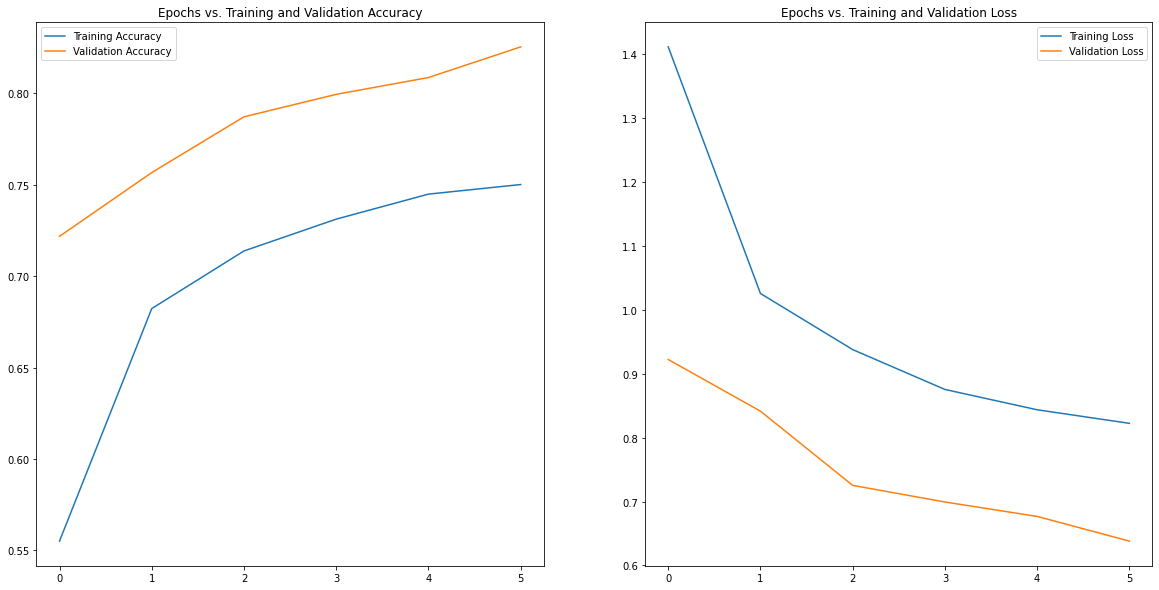

In [18]:
# Visualize epochs vs. train and validation accuracies and losses

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 136,586
Trainable params: 134,538
Non-trainable params: 2,048
_________________________________________________________________


# Calculate the accuracy and loss on test data

In [20]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=0)

print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))

Test accuracy is: 0.8072 
Test loss is: 0.7240


# Confusion Matrix

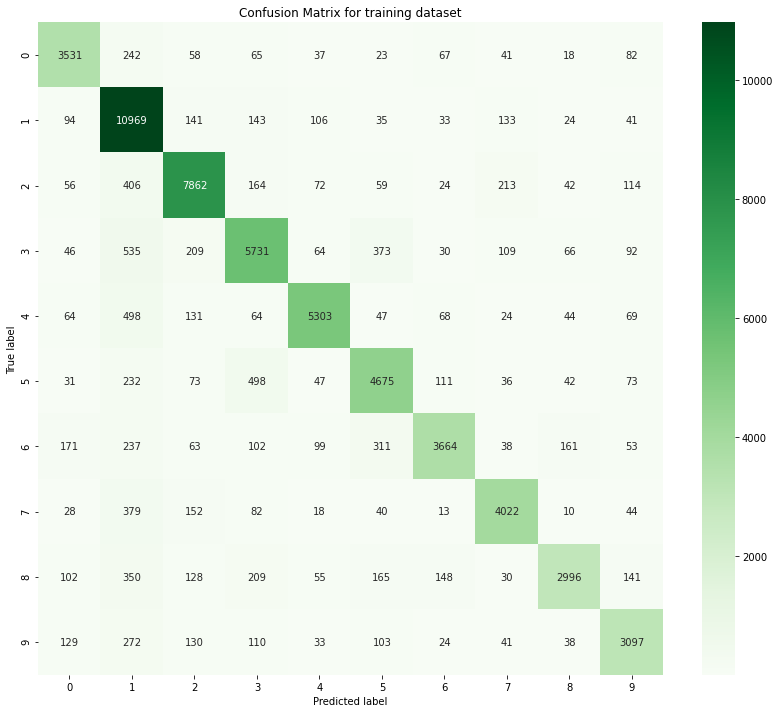

In [21]:
y_pred = model.predict(X_train)
y_pred = lb.inverse_transform(y_pred, lb.classes_)
y_train = lb.inverse_transform(y_train, lb.classes_)


# Plot the confusion matrix

matrix = confusion_matrix(y_train, y_pred, labels=lb.classes_)

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(matrix, annot=True, cmap='Greens', fmt='d', ax=ax)
plt.title('Confusion Matrix for training dataset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [22]:
from sklearn import metrics

print("Precision Score : ",metrics.precision_score(y_train, y_pred, average='macro'))

print("Recall Score : ",metrics.recall_score(y_train, y_pred, average='micro'))

print("F1 Score : ",metrics.f1_score(y_train, y_pred, average='weighted'))



Precision Score :  0.8414907504141418
Recall Score :  0.8326909488019528
F1 Score :  0.8319077309338978


# Print the test accuracy

In [23]:
print('Test accuracy:', test_acc)

Test accuracy: 0.80716044


In [24]:
predictions = model.predict(test_images)

In [25]:
model.predict_classes(test_images)[6]

9